In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
X_train = df_train.drop('label',axis='columns')
y_train = df_train['label']

X_test = df_test.drop('label',axis='columns')
y_test = df_test['label']
X_train


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [4]:
model = SVC()

In [5]:
model.fit(X_train, y_train)

SVC()

In [6]:
model.score(X_test, y_test)

0.8418851087562744

In [7]:
#data for 6 = G
model.predict([[149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,154,153,154,154,153,154,153,154,153,153,152,152,152,151,150,151,150,151,151,152,152,152,153,153,152,152,152,153,154,154,155,155,154,154,155,155,155,155,154,153,153,151,151,152,150,151,151,152,152,152,154,154,154,154,154,153,154,155,156,157,157,156,155,156,155,154,154,155,152,154,153,153,151,152,152,152,154,154,154,154,154,155,157,156,156,156,154,150,146,147,146,147,143,137,126,126,142,139,152,154,152,153,153,154,154,155,154,155,155,154,153,150,144,143,145,139,142,144,157,157,147,139,128,119,130,113,147,156,151,153,153,155,155,156,155,152,145,139,141,141,141,153,153,143,135,137,139,133,121,107,101,104,110,127,157,156,151,152,153,155,155,154,151,146,139,131,130,134,137,132,125,111,101,94,95,105,113,122,133,145,153,157,156,156,152,152,154,152,151,150,149,149,139,122,104,98,92,82,81,81,85,114,145,157,160,162,161,159,157,156,156,156,151,151,150,146,145,147,148,147,145,132,97,71,62,66,88,116,145,162,160,159,157,155,156,157,157,156,155,155,151,145,144,145,147,145,147,150,150,124,92,68,63,67,86,159,163,155,158,157,156,156,157,156,156,156,155,154,143,144,145,145,143,147,152,152,128,90,79,68,64,70,67,84,147,164,157,158,157,157,157,156,157,156,156,155,145,146,143,145,145,150,149,149,139,118,85,62,62,75,73,62,67,140,164,157,158,158,158,158,157,157,156,156,150,147,144,147,149,148,149,158,158,136,94,63,58,69,85,82,67,70,156,160,159,160,159,158,157,156,156,156,147,148,147,145,148,152,151,160,153,119,86,66,64,63,69,75,78,57,130,165,158,159,158,159,158,157,157,157,149,148,146,145,147,149,146,151,144,110,78,65,66,66,58,59,64,79,150,165,162,162,162,162,161,161,158,156,151,146,143,141,138,140,142,146,144,121,84,56,62,70,71,68,57,117,144,144,147,149,152,150,146,146,154,160,147,144,143,142,140,142,146,151,154,131,85,59,51,60,85,69,64,76,75,79,81,79,76,83,112,141,163,163,144,148,147,145,145,148,150,155,151,119,74,62,63,55,62,72,73,77,74,73,68,88,113,138,162,162,168,168,146,146,142,141,141,138,134,142,124,96,75,67,65,63,62,78,87,76,84,96,126,162,172,155,144,149,151,161,142,136,132,134,127,119,118,119,103,87,77,73,70,62,64,72,93,134,155,160,166,156,150,151,143,136,145,149,130,132,127,120,114,110,109,105,91,77,74,75,74,65,73,113,166,177,170,161,152,141,134,136,140,133,127,130,113,116,115,106,101,95,86,84,85,77,78,74,76,103,152,179,170,157,155,151,140,129,126,126,133,130,122,125,81,86,85,83,76,72,73,76,77,79,71,101,151,178,177,170,161,152,147,151,133,115,121,121,124,126,122,122,61,61,67,69,70,75,78,78,81,68,113,165,174,169,162,157,149,148,148,148,126,100,113,117,113,122,118,115,69,69,77,78,75,76,78,79,67,120,173,157,159,148,155,150,138,143,148,149,123,91,101,111,111,116,113,118,74,75,76,75,75,76,75,68,124,172,152,146,146,146,152,142,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107]])

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([6], dtype=int64)

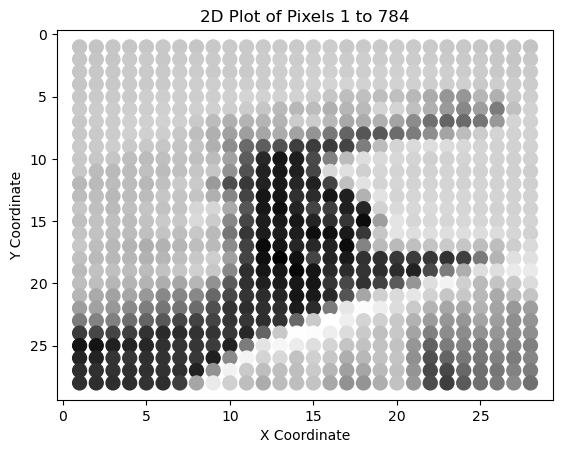

In [8]:
#data for 6 = G
pixel_values = [149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,153,154,153,154,154,153,154,153,154,153,153,152,152,152,151,150,151,150,151,151,152,152,152,153,153,152,152,152,153,154,154,155,155,154,154,155,155,155,155,154,153,153,151,151,152,150,151,151,152,152,152,154,154,154,154,154,153,154,155,156,157,157,156,155,156,155,154,154,155,152,154,153,153,151,152,152,152,154,154,154,154,154,155,157,156,156,156,154,150,146,147,146,147,143,137,126,126,142,139,152,154,152,153,153,154,154,155,154,155,155,154,153,150,144,143,145,139,142,144,157,157,147,139,128,119,130,113,147,156,151,153,153,155,155,156,155,152,145,139,141,141,141,153,153,143,135,137,139,133,121,107,101,104,110,127,157,156,151,152,153,155,155,154,151,146,139,131,130,134,137,132,125,111,101,94,95,105,113,122,133,145,153,157,156,156,152,152,154,152,151,150,149,149,139,122,104,98,92,82,81,81,85,114,145,157,160,162,161,159,157,156,156,156,151,151,150,146,145,147,148,147,145,132,97,71,62,66,88,116,145,162,160,159,157,155,156,157,157,156,155,155,151,145,144,145,147,145,147,150,150,124,92,68,63,67,86,159,163,155,158,157,156,156,157,156,156,156,155,154,143,144,145,145,143,147,152,152,128,90,79,68,64,70,67,84,147,164,157,158,157,157,157,156,157,156,156,155,145,146,143,145,145,150,149,149,139,118,85,62,62,75,73,62,67,140,164,157,158,158,158,158,157,157,156,156,150,147,144,147,149,148,149,158,158,136,94,63,58,69,85,82,67,70,156,160,159,160,159,158,157,156,156,156,147,148,147,145,148,152,151,160,153,119,86,66,64,63,69,75,78,57,130,165,158,159,158,159,158,157,157,157,149,148,146,145,147,149,146,151,144,110,78,65,66,66,58,59,64,79,150,165,162,162,162,162,161,161,158,156,151,146,143,141,138,140,142,146,144,121,84,56,62,70,71,68,57,117,144,144,147,149,152,150,146,146,154,160,147,144,143,142,140,142,146,151,154,131,85,59,51,60,85,69,64,76,75,79,81,79,76,83,112,141,163,163,144,148,147,145,145,148,150,155,151,119,74,62,63,55,62,72,73,77,74,73,68,88,113,138,162,162,168,168,146,146,142,141,141,138,134,142,124,96,75,67,65,63,62,78,87,76,84,96,126,162,172,155,144,149,151,161,142,136,132,134,127,119,118,119,103,87,77,73,70,62,64,72,93,134,155,160,166,156,150,151,143,136,145,149,130,132,127,120,114,110,109,105,91,77,74,75,74,65,73,113,166,177,170,161,152,141,134,136,140,133,127,130,113,116,115,106,101,95,86,84,85,77,78,74,76,103,152,179,170,157,155,151,140,129,126,126,133,130,122,125,81,86,85,83,76,72,73,76,77,79,71,101,151,178,177,170,161,152,147,151,133,115,121,121,124,126,122,122,61,61,67,69,70,75,78,78,81,68,113,165,174,169,162,157,149,148,148,148,126,100,113,117,113,122,118,115,69,69,77,78,75,76,78,79,67,120,173,157,159,148,155,150,138,143,148,149,123,91,101,111,111,116,113,118,74,75,76,75,75,76,75,68,124,172,152,146,146,146,152,142,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107]
# Create x and y coordinates for each pixel
x = list(range(1, 29)) * 28  # X-coordinate
y = [i for i in range(1, 29) for _ in range(28)]  # Y-coordinate

# Create a scatter plot of the pixels
plt.scatter(x, y, c=pixel_values, cmap='gray', s=100)  # 'gray' colormap for grayscale pixels

plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Plot of Pixels 1 to 784')

# Show the plot
plt.show()

**Tune parameters**

Class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html